In [58]:
# import numpy as np
# import pandas as pd
# df = pd.read_csv("../../datasets/情感分析/train.txt",delimiter=";",names=['sentence','label'])
# df.to_csv("train.csv", encoding='utf-8', index=False)


In [59]:
import numpy as np
import pandas as pd
df = pd.read_csv('train.csv')
df.head(10)

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [60]:
print(df.shape)
print(df.isnull().sum())   # 检查空值

(16000, 2)
sentence    0
label       0
dtype: int64


In [61]:
# 需要映入的库
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [62]:
def review_to_words(raw_review):
    # 通过BeautifulSoup抽取纯文本
    review_text = BeautifulSoup(raw_review).get_text()
    # 通过正则表达式去掉标点符号
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    # 转化为小写，并进行分词
    words = letters_only.lower().split()
    # 去停用词
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if w not in stops]

    # print(meaningful_words)
    # 还原词性
    lemmatizer = WordNetLemmatizer()
    r_words = [lemmatizer.lemmatize(w) for w in  meaningful_words]

    # 将处理后的数据返回
    cleaned_review = " ".join(r_words)
    return cleaned_review


In [63]:
clean_review = review_to_words(df["sentence"][0])
print(clean_review)

didnt feel humiliated


In [64]:
# import re
# import string
# """
# 移除网址，$数字$, 数字， 标点符号
# """
# def remove_hyperlinks(text):
#     sentence = re.sub(r'www?:\/\/.*[\r\n]*', '', text)
#     sentence = re.sub(r'http?:\/\/.*[\r\n]*', '', sentence)
#     return re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)
#
# def remove_currencies(text):
#     return re.sub(r'[\$\d+\d+\$]', '', text)
#
# def remove_number(text):
#     return re.sub(r'\d+', '', text)
#
# def remove_punctuation(text):
#     return ''.join([word for word in text if word not in string.punctuation])
#
# df['sentence'] = df['sentence'].apply(lambda x: remove_hyperlinks(x.lower()))
# df['sentence'] = df['sentence'].apply(lambda x: remove_currencies(x))
# df['sentence'] = df['sentence'].apply(lambda x: remove_number(x))
# df.head(10)

In [65]:
# import nltk
# from nltk.corpus import stopwords
# stopword = stopwords.words('english')
# print(stopword)
# def remove_stopword(text):
#     return [word for word in text if word not in stopword]
#
# df['sentence'] = df['sentence'].apply(lambda x: remove_stopword(x))
# df.head(10)
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# # 把一些名词的词性还原 如 cars-->car
# lemmatizer = WordNetLemmatizer()
# def lemmatize(text):
#     return ' '.join([lemmatizer.lemmatize(word) for word in text])
#
# df['sentence'] = df['sentence'].apply(lambda x: lemmatize(x))
# df.head(10)


出现报错 partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)
解决方案 https://www.cnblogs.com/LHWorldBlog/p/9641374.html

In [66]:
num_reviews=len(df)
# 对数据进行清洗
clean_train_reviews=[]
print("Cleaning and parsing the training set movie reviews...\n")
for i in range(0,num_reviews):
    if((i+1)%1000 == 0):
        print("Review %d of %d \n" % (i+1, num_reviews))
    temp_review=review_to_words(df["sentence"][i])
    clean_train_reviews.append(temp_review)
clean_train_reviews[:5]

Cleaning and parsing the training set movie reviews...

Review 1000 of 16000 

Review 2000 of 16000 

Review 3000 of 16000 

Review 4000 of 16000 

Review 5000 of 16000 

Review 6000 of 16000 

Review 7000 of 16000 

Review 8000 of 16000 

Review 9000 of 16000 

Review 10000 of 16000 

Review 11000 of 16000 

Review 12000 of 16000 

Review 13000 of 16000 

Review 14000 of 16000 

Review 15000 of 16000 

Review 16000 of 16000 



['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy']

In [67]:
df['sentence'] = clean_train_reviews

In [68]:
df.head(10)

,sentence,label
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
5,ive feeling little burdened lately wasnt sure,sadness
6,ive taking milligram time recommended amount i...,surprise
7,feel confused life teenager jaded year old man,fear
8,petronas year feel petronas performed well mad...,joy
9,feel romantic,love


In [69]:
# 获取类别
category = df["label"].unique().tolist()

In [70]:
sentence = df['sentence'].values
label = df["label"].apply(lambda x: category.index(x)).values

In [71]:
# 获取所有不重复的单词
words = [word.lower() for s in sentence for word in s.split(" ")]
various_words = list(set(words))

In [72]:
int2word = dict(enumerate(various_words))  # 索引到单词
word2int = {w:int(i) for i,w in int2word.items()} # 单词到索引

In [73]:
from collections import Counter
Counter(label)

Counter({0: 4666, 1: 2159, 2: 1304, 3: 572, 4: 1937, 5: 5362})

In [74]:
sentence_length = [len(s.split()) for s in sentence]   # 每个句子单词的个数
counts = dict(Counter(sentence_length))

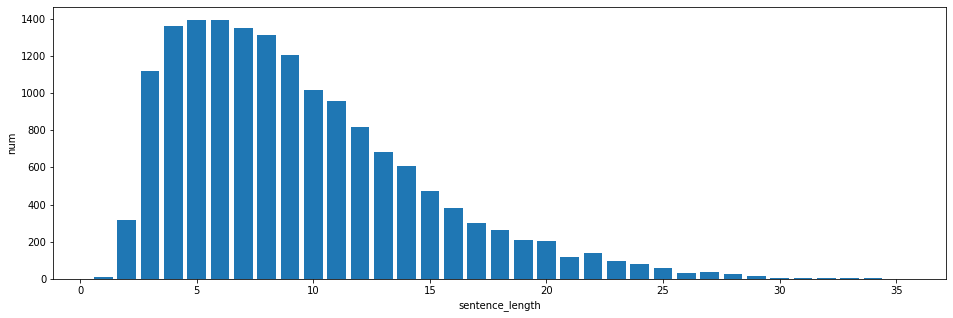

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.bar(counts.keys(),counts.values())
plt.xlabel("sentence_length")
plt.ylabel("num")
plt.show()

In [76]:
min_sen = min(counts.items())
max_sen = max(counts.items())
print("min:{}, max:{}".format(min_sen,max_sen))

min:(1, 8), max:(35, 2)


In [77]:
"""
    获取最小和最大长度的句子的索引
"""
min_index = [i for i,length in enumerate(sentence_length) if length==min_sen[0]]
max_index = [i for i,length in enumerate(sentence_length) if length==max_sen[0]]

In [78]:
new_text = np.delete(sentence, min_index)
new_text2 = np.delete(new_text, max_index)
print("原始文本数量：",len(new_text))
print("新文本数量: ", len(new_text2))

原始文本数量： 15992
新文本数量:  15990


In [79]:
new_labels = np.delete(label, min_index)
new_labels = np.delete(new_labels, max_index)
print("原始标签数量：",len(new_text))
print("新标签数量: ", len(new_text2))

原始标签数量： 15992
新标签数量:  15990


In [80]:
text2ints = []
for sentence in new_text2:
    sample = list()
    for word in sentence.split():
        int_value = word2int[word]
        sample.append(int_value)
    text2ints.append(sample)

In [81]:
text2ints[:5]

[[4462, 12249, 3478],
 [12895, 8576, 10651, 12549, 9685, 6183, 6867, 11221, 507],
 [8103, 8820, 5447, 711, 12249, 2056, 1117],
 [10354, 8576, 13471, 9298, 841, 4074, 10742],
 [8576, 2381]]

In [83]:
def reset_text(text, seq_len):
    dataset = np.zeros((len(text),seq_len))
    for index,sentence in enumerate(text):
        if len(sentence) < seq_len:
            dataset[index, :len(sentence)] = sentence  # 后面填充0
        else:
            dataset[index, :] = sentence[:seq_len]  # 截断
    return dataset

dataset = reset_text(text2ints, seq_len=22)
dataset

array([[ 4462., 12249.,  3478., ...,     0.,     0.,     0.],
       [12895.,  8576., 10651., ...,     0.,     0.,     0.],
       [ 8103.,  8820.,  5447., ...,     0.,     0.,     0.],
       ...,
       [12249.,  9863.,  6274., ...,     0.,     0.,     0.],
       [12249.,  1214.,  4355., ...,     0.,     0.,     0.],
       [  841., 11879., 12249., ...,     0.,     0.,     0.]])

In [84]:
import torch
import torch.nn as nn
## 转化为张量
dataset_tensor = torch.from_numpy(dataset)
label_tensor = torch.from_numpy(new_labels)
print(type(dataset_tensor), type(label_tensor))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [107]:
all_samples = len(dataset_tensor)
train_ratio = 0.8
val_ratio = 0.2
train = dataset_tensor[:int(train_ratio*all_samples)]
train_labels = label_tensor[:int(train_ratio*all_samples)]

val = dataset_tensor[int(train_ratio*all_samples):]
val_labels = label_tensor[int(train_ratio*all_samples):]

print("训练集:{}----{}".format(train.shape, train_labels.shape))

print("验证集:{}----{}".format(val.shape,val_labels.shape))

训练集:torch.Size([12792, 22])----torch.Size([12792])
验证集:torch.Size([3198, 22])----torch.Size([3198])


In [108]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train, train_labels)
val_dataset = TensorDataset(val, val_labels)

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, drop_last=True)

num_worker应该不大于2 https://www.cnblogs.com/longyi8013/p/14880432.html

In [109]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [110]:
class SentimentNet(nn.Module):
    def __init__(self, input_size, embedding_dim, hidden_dim, output_size, num_layers, dropout=0.5):
        super(SentimentNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.output_size = output_size
        self.num_layers = num_layers

        self.embedding= nn.Embedding(input_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, dropout=dropout,batch_first=True)
        self.linear = nn.Linear(hidden_dim, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, output_size)

        self.dropout = nn.Dropout(p=0.4)

    def forward(self, x, hidden):
        """
             x:  (128,10)
        """

        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x) # embeds(128,10,200)


        #  out(128,22,128)--batch_size,seq_len, hidden_size
        #  hidden是个元组{h_n,c_n}每个都是(2, 128,128) -- num_layer,batch_size, hidden_size
        out,hidden = self.lstm(embeds, hidden)
        out = self.linear(out[:, -1, :]) # out(128，128)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear2(out) # out(128, 6)

        return out, hidden # hidden (h_n, c_n)

    def init_hidden(self, batch_size):
        weight = next(self.parameters())
        # h_0, c_0
        return (weight.new_zeros(self.num_layers, batch_size, self.hidden_dim),
                weight.new_zeros(self.num_layers, batch_size, self.hidden_dim))

In [111]:
input_size = len(word2int)
output_size = len(category)
embedding_dim = 200
hidden_dim= 128
num_layers= 2

In [112]:
model = SentimentNet(input_size, embedding_dim, hidden_dim, output_size, num_layers)
model.to(device)

SentimentNet(
  (embedding): Embedding(13478, 200)
  (lstm): LSTM(200, 128, num_layers=2, batch_first=True, dropout=0.5)
  (linear): Linear(in_features=128, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=6, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [113]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
# Decay LR by a factor of 0.1 every 3 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [114]:
def train(model, data_loader, criterion, optimizer, scheduler, num_epochs):
    train_process = dict()
    train_loss_epoch10, val_loss_epoch10= [],[]
    val_acc_epoch10 = []
    for epoch in range(num_epochs):
        hs = model.init_hidden(batch_size)
        train_loss = []
        train_correct = 0
        model.train()
        for data, target in data_loader:
            data = data.to(device)
            target = target.to(device)
            output,hs = model(data, hs)
            preds = torch.argmax(output, dim=1)
            train_correct += torch.sum(preds==target)

            hs = tuple([h.data for h in hs])
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        print(f"Epoch [{epoch}/{num_epochs-1}]---train loss {np.mean(train_loss):>.5f}")

        scheduler.step()

        if epoch % 10 == 0:
            validation_loss, validation_acc = validation(model, val_loader, criterion)

            train_loss_epoch10.append(np.mean(train_loss))
            val_loss_epoch10.append(validation_loss)
            val_acc_epoch10.append(validation_acc)

    train_process["train_loss"] = train_loss_epoch10
    train_process["val_loss"] = val_loss_epoch10
    train_process["val_acc"] = val_acc_epoch10
    return train_process

def validation(model, val_loader, criterion):
    model.eval()
    hs = model.init_hidden(batch_size)
    val_loss = []
    val_correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data = data.to(device)
            target = target.to(device)
            outs,hs = model(data,hs)
            hs = tuple([h.data for h in hs])

            loss = criterion(outs, target)
            preds = torch.argmax(outs, dim=1)
            val_loss.append(loss.item())
            val_correct += torch.sum(preds==target)
    print(f"--------------------------------validation loss is: {np.mean(val_loss):>.5f}, acc is: {100*val_correct/len(val_loader.dataset):>.2f}%")
    return np.mean(val_loss), val_correct/len(val_loader.dataset)

In [115]:
train_process = train(model, train_loader, criterion, optimizer,exp_lr_scheduler, num_epochs=100)

Epoch [0/99]---train loss 1.59561
--------------------------------validation loss is: 1.57851, acc is: 31.36%
Epoch [1/99]---train loss 1.58089
Epoch [2/99]---train loss 1.45152
Epoch [3/99]---train loss 1.16529
Epoch [4/99]---train loss 1.04221
Epoch [5/99]---train loss 0.92176
Epoch [6/99]---train loss 0.79348
Epoch [7/99]---train loss 0.66122
Epoch [8/99]---train loss 0.55338
Epoch [9/99]---train loss 0.35823
Epoch [10/99]---train loss 0.19518
--------------------------------validation loss is: 0.59617, acc is: 80.68%
Epoch [11/99]---train loss 0.16765
Epoch [12/99]---train loss 0.15159
Epoch [13/99]---train loss 0.13251
Epoch [14/99]---train loss 0.12101
Epoch [15/99]---train loss 0.11351
Epoch [16/99]---train loss 0.10680
Epoch [17/99]---train loss 0.09633
Epoch [18/99]---train loss 0.08807
Epoch [19/99]---train loss 0.08218
Epoch [20/99]---train loss 0.07582
--------------------------------validation loss is: 0.68111, acc is: 81.52%
Epoch [21/99]---train loss 0.07480
Epoch [22/99

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

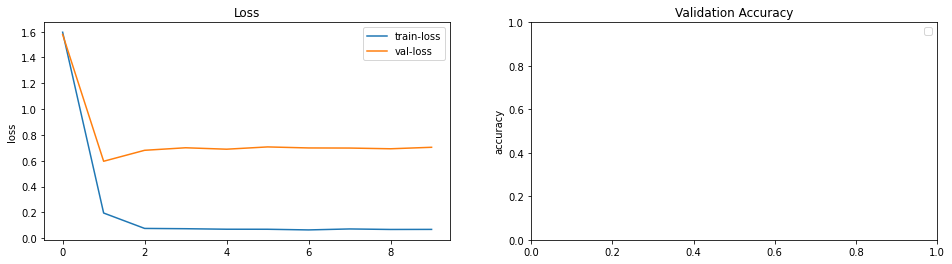

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Loss")
plt.ylabel("loss")
plt.plot(train_process["train_loss"],label="train-loss")
plt.plot(train_process["val_loss"],label="val-loss")
plt.legend()

plt.subplot(1,2,2)
plt.legend(labels=[""])
plt.ylabel("accuracy")
plt.title("Validation Accuracy")
plt.plot(train_process["val_acc"].cpu())
plt.show()

In [118]:
from string import punctuation
texts = ["i like to have the same breathless feeling as a reader eager to see what will happen next",
        "i don t feel particularly agitated",
         "i feel like i m defective or something for not having baby fever"
       ]
def converts(text):
    text = remove_hyperlinks(text)
    text = remove_currencies(text)
    text = remove_number(text)
    new_text = remove_punctuation(text)
    test_text_ints = [word2int[word.lower()]for word in new_text.split() if word in word2int.keys()]
    return test_text_ints

def predict(model):
    test_text_ints = [converts(text) for text in texts]

    new_test_text_ints = reset_text(test_text_ints, seq_len=22)
    text_tensor = torch.from_numpy(new_test_text_ints)

    batch_size = text_tensor.size(0)
    hs = model.init_hidden(batch_size)

    text_tensor = text_tensor.to(device)
    outs, hs = model(text_tensor,hs)
    preds = torch.argmax(outs, dim=1)

    for i in range(len(texts)):
        print(texts[i])
        print("   预测结果是: ", category[int(preds[i])])

predict(model)

i like to have the same breathless feeling as a reader eager to see what will happen next
   预测结果是:  joy
i don t feel particularly agitated
   预测结果是:  fear
i feel like i m defective or something for not having baby fever
   预测结果是:  sadness
